# **Predict employee future in company**

**About The Dataset**
1. Education: employee’s education level [Bachelors, Masters, PHD]
2. Joining year: year of joining company [year]
3. City: City office where posted [City name]
4. Payment Tier: Payment Tier [1: highest, 2: mid level, 3: lowest]
5. Age: current employee age [years]
6. Gender: gender of employee [Male, Female]
7. Ever Benched: ever kept out of project for 1 month or more [True, False]
8. Experience in Current Field [0-7]
9. Leave or not: whether employee leaves the company in next two years [0,1]

# **Imports**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#RandomForest
from sklearn.ensemble import RandomForestClassifier
#LogisticRegression
from sklearn.linear_model import LogisticRegression
#XGBoost
from xgboost import XGBClassifier
#NeuralNetwork
from sklearn.neural_network import MLPClassifier

In [ ]:
data_frame = pd.read_csv("Employee.csv")
data_frame.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# **Data visualization**

In [ ]:
print(data_frame.dtypes)

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


In [ ]:
data_frame.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [ ]:
data_frame.duplicated().sum()

1889

In [ ]:
data_frame['Education'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

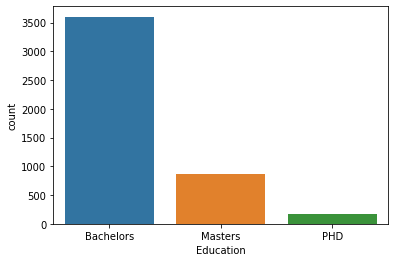

In [ ]:
sns.countplot(x = 'Education',data = data_frame)
plt.show()

Most of the Employees completed bachelors degree.

In [ ]:
data_frame['JoiningYear'].value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

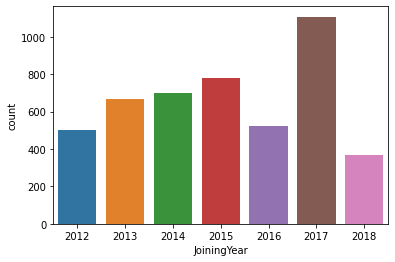

In [ ]:
sns.countplot(x = 'JoiningYear',data = data_frame)
plt.show()

The biggest number of the Employees joined in 2017.

In [ ]:
data_frame['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

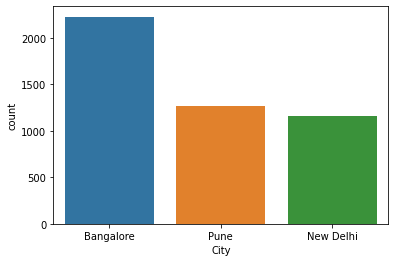

In [ ]:
sns.countplot(x = 'City',data = data_frame)
plt.show()

The biggest number of the Employees are from Bangalore.

In [ ]:
data_frame['PaymentTier'].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

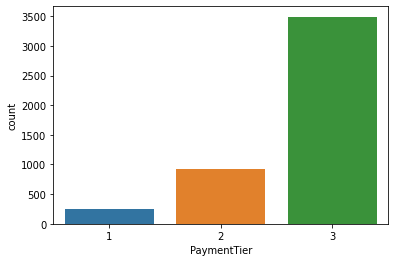

In [ ]:
sns.countplot(x = 'PaymentTier',data = data_frame)
plt.show()

Most of the Employees belong to Payment Tier 3.

In [ ]:
data_frame['Gender'].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

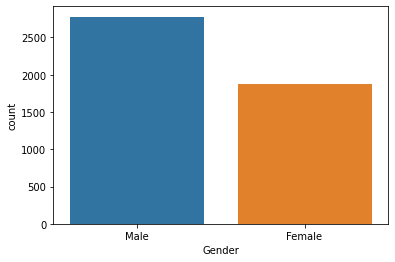

In [ ]:
sns.countplot(x = 'Gender',data = data_frame)
plt.show()

There is more male Employees than female.

In [ ]:
data_frame['EverBenched'].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

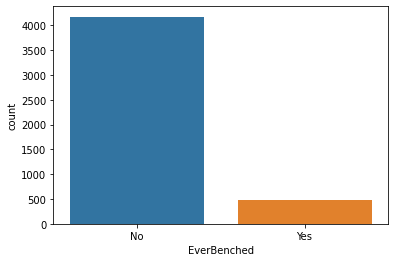

In [ ]:
sns.countplot(x = 'EverBenched',data = data_frame)
plt.show()

Most of the Employees are not benched.

In [ ]:
data_frame['ExperienceInCurrentDomain'].value_counts()

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

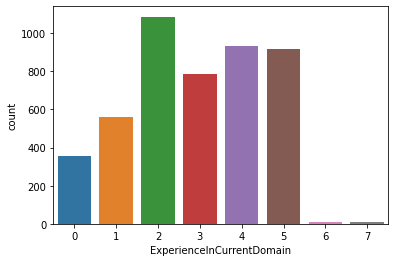

In [ ]:
sns.countplot(x = 'ExperienceInCurrentDomain',data = data_frame)
plt.show()

The biggest number of Employees have two years of experience.

In [ ]:
data_frame['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

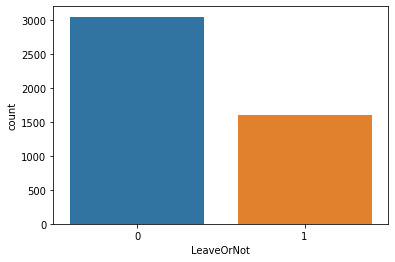

In [ ]:
sns.countplot(x = 'LeaveOrNot',data = data_frame)
plt.show()

Most of the employess are not supposed to leave.

# **Preprocessing**

Because we have duplicate values in our data, we should delete them from data_frame.

In [ ]:
data_frame.drop_duplicates(inplace=True)
data_frame.duplicated().sum()

0

## **Encoding**

Machine learning algorithms cannot work with categorical data directly. Because we have in our data_frame strings and real values so categorical data must be converted to numbers. We get here a one hot encoding which is a representation of categorical variables as binary vectors.

In [ ]:
#Encoding
data = pd.get_dummies(data=data_frame, columns=['Education', 'City', 'Gender','EverBenched'],drop_first=True)
data

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,0,0,0,0,0,1,0
1,2013,1,28,3,1,0,0,0,1,0,0
2,2014,3,38,2,0,0,0,1,0,0,0
3,2016,3,27,5,1,1,0,0,0,1,0
4,2017,3,24,2,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4645,2017,2,31,2,0,1,0,0,1,0,0
4647,2016,3,30,2,0,0,0,0,1,1,0
4649,2013,2,37,2,1,1,0,0,1,1,0
4650,2018,3,27,5,1,1,0,1,0,1,0


## **Split data**

Here we spilt our data into random train and test subsets. As we can see the test data will account for 30% of the total data and the train data 70%. 

In [ ]:
#split data
X = data.drop(columns=['LeaveOrNot'],axis=1)
y = data['LeaveOrNot']
X_train_1, X_test_1, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## **Standardize features**

Nowe we standardize features by removing the mean and scaling to unit variance. Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform. fit_transform first fit to data and then transform it.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_1)
X_test = scaler.transform(X_test_1)
data_frame = pd.DataFrame(X_train, columns = 
                          ['JoiningYear', 'PaymentTier','Age', 'ExperienceInCurrentDomain',
                          'Education_Masters', 'Education_PHD', 'City_New_Delhi','City_Pune','Gender_Male','EverBenched_Yes'])
data_frame.head()


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New_Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,-0.063992,0.584485,-0.600395,-0.398535,-0.554653,-0.244389,-0.627994,-0.635203,-1.102429,-0.389713
1,-1.130898,-1.014375,-0.212241,-1.024158,-0.554653,-0.244389,-0.627994,1.574299,0.907088,-0.389713
2,-1.130898,0.584485,-0.406318,0.852710,-0.554653,-0.244389,-0.627994,-0.635203,0.907088,2.565992
3,1.002914,0.584485,-0.018163,-1.024158,-0.554653,-0.244389,-0.627994,1.574299,0.907088,-0.389713
4,-0.063992,-1.014375,-0.212241,-0.398535,-0.554653,-0.244389,-0.627994,1.574299,-1.102429,-0.389713


# **Algorithms**

## **KNN**


First of all we compute the error rate. After that we look at the graph and choose (or compute if necessary) the argument with the minimum value. At the end we use that argument as parameter in KNNClassifier.

In [ ]:
#compute error_rate
error_rate = []
for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

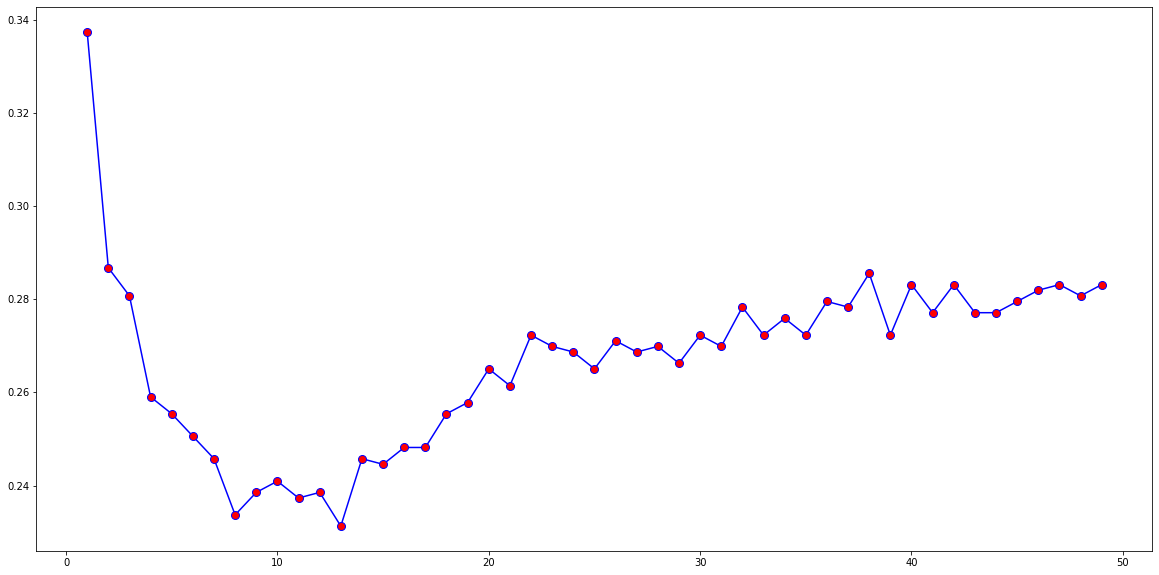

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(range(1,50), error_rate, color='blue', linestyle='-', marker='o', markerfacecolor='red', markersize= 8)

In [ ]:
#find minimum of error_rate
print(f'Lowest error rate: {min(error_rate)}, for n_negihbors = {error_rate.index(min(error_rate))+1}')

Lowest error rate: 0.23132530120481928, for n_negihbors = 13


In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors= 13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
#confusion matrix: 
#true positive, false positive
#false negative, true negative
prediction_knn = knn.predict(X_test)
print(confusion_matrix(y_test, prediction_knn))

[[472  43]
 [149 166]]


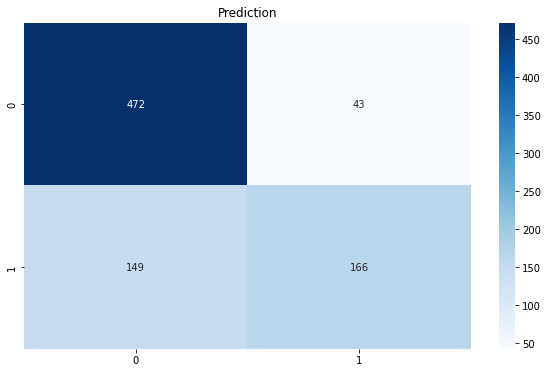

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test, prediction_knn), annot = True, fmt = ".0f", cmap = 'Blues')
plt.title("Prediction")
plt.show()

In [ ]:
KNN_accuracy = metrics.accuracy_score(y_test, prediction_knn)*100
print(f'KNN accuracy: {KNN_accuracy}')

KNN accuracy: 76.86746987951807


## **Logistic Regression**

Before building a model, we will use the GridSearchCV function to choose the best parameters to perform Logistic Regression Classifier better.

In [ ]:
logistic_model = LogisticRegression()
grid_parameters = {'C': [0.01, 0.1, 1, 2, 10, 100] } 

grid_search_lg = GridSearchCV(logistic_model, grid_parameters, cv=5).fit(X_train, y_train)

print(grid_search_lg.best_params_)

{'C': 0.01}


In [ ]:
#Logistic regression
logistic_regression = LogisticRegression(C=0.01) 
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [ ]:
prediction_lr = logistic_regression.predict(X_test)
print(confusion_matrix(y_test, prediction_lr))

[[452  63]
 [194 121]]


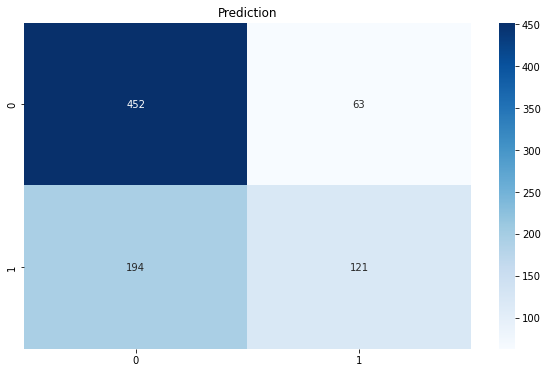

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test, prediction_lr), annot = True, fmt = ".0f", cmap = 'Blues')
plt.title("Prediction")
plt.show()

In [ ]:
logistic_regression_accuracy = metrics.accuracy_score(y_test, prediction_lr)*100
print(f' Logistic Regression accuracy: {logistic_regression_accuracy}')

 Logistic Regression accuracy: 69.03614457831326


## **Random Forest**

First of all we use the RandomizedSearchCV to choose the best parameters which we use then to the RandomForestClassifier and get the result.

In [ ]:
Randomforest_model= RandomForestClassifier()
max_depth=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
n_estimators=[100, 500, 1000]
max_features=[2, 3, 4, 5]
bootstrap=[True, False]
min_samples_split=[2, 5, 10]

grid_parameters= {'n_estimators':n_estimators,
            'max_features':max_features,
            'bootstrap':bootstrap, 
            'max_depth':max_depth, 
            'min_samples_split':min_samples_split}


grid_search = RandomizedSearchCV(estimator=Randomforest_model, param_distributions=grid_parameters, n_iter=100, cv=3, verbose=2, n_jobs=-1).fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 1000, 'min_samples_split': 10, 'max_features': 4, 'max_depth': 10, 'bootstrap': True}


In [ ]:
#Random forest
forest = RandomForestClassifier(n_estimators=1000, max_features=4, bootstrap=True, max_depth=10, min_samples_split=10)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=4, min_samples_split=10,
                       n_estimators=1000)

In [ ]:
prediction_forest = forest.predict(X_test)
print(confusion_matrix(y_test, prediction_forest))

[[468  47]
 [118 197]]


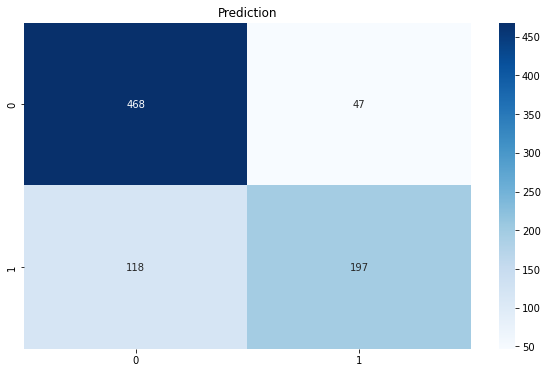

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test, prediction_forest), annot = True, fmt = ".0f", cmap = 'Blues')
plt.title("Prediction")
plt.show()

In [ ]:
random_forest_accuracy = metrics.accuracy_score(y_test, prediction_forest)*100
print(f' Random Forest accuracy: {random_forest_accuracy}')

 Random Forest accuracy: 80.12048192771084


## **XGBoost** 
First of all we use the GridSearchCV to choose the best parameters which we use then to the XGBClassifier and get the result.


In [ ]:
XGB = XGBClassifier(n_jobs=-1, random_state=1000, eval_metric='logloss')
parameters = {
    'n_estimators':[ 50,100,200],
    'max_depth':[5,6,7,8],
    'learning_rate':[0.1,0.01]}
model_grid_XGB = GridSearchCV(XGB, parameters, cv=10, verbose=1).fit(X_train, y_train)
print(model_grid_XGB.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}


In [ ]:
#XGBoost
XGB = XGBClassifier(n_jobs=-1, random_state=1000, n_estimators=50, max_depth=6,
                    learning_rate=0.1, eval_metric='logloss')
XGB.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', max_depth=6, n_estimators=50, n_jobs=-1,
              random_state=1000)

In [ ]:
prediction_XGB = XGB.predict(X_test)
print(confusion_matrix(y_test, prediction_XGB))

[[468  47]
 [118 197]]


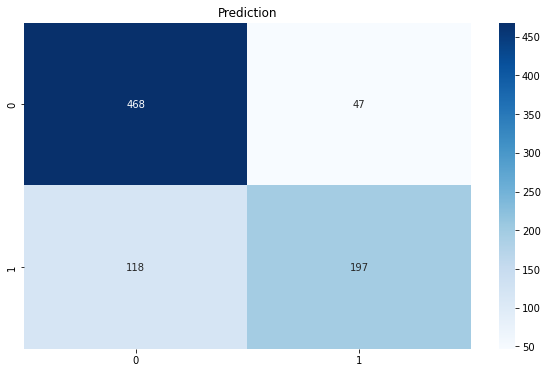

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test, prediction_XGB), annot = True, fmt = ".0f", cmap = 'Blues')
plt.title("Prediction")
plt.show()

In [ ]:
xgboost_accuracy = metrics.accuracy_score(y_test, prediction_XGB)*100
print(f'XGBoost accuracy: {xgboost_accuracy}')

XGBoost accuracy: 80.12048192771084


## **Neural Network**

As before, we use the GridSearchCV to choose the best parameters for our Neural Network model.

In [ ]:
Neural_network_model = MLPClassifier(max_iter=100)
grid_parameters_nw = { 
              'hidden_layer_sizes':[(10,30,10),(20,)],
              'activation':['tanh','relu'],
              'solver':['sgd','adam'],
              'alpha':[0.0001,0.05],
              'learning_rate':['constant','adaptive']}
grid_search_nw = GridSearchCV(Neural_network_model, grid_parameters_nw, n_jobs=-1, cv=5).fit(X_train, y_train)
print("best parameters:", grid_search_nw.best_params_)

best parameters: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
NeuralNetwork = MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(10,30,10), learning_rate='adaptive', solver='adam')
NeuralNetwork.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(10, 30, 10),
              learning_rate='adaptive')

In [ ]:
prediction_neural_network = NeuralNetwork.predict(X_test)
print(confusion_matrix(y_test, prediction_neural_network))

[[463  52]
 [119 196]]


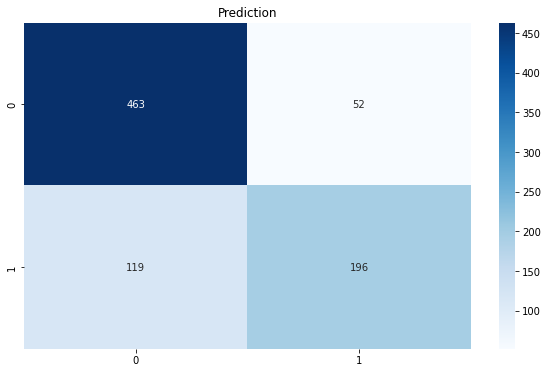

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test, prediction_neural_network), annot = True, fmt = ".0f", cmap = 'Blues')
plt.title("Prediction")
plt.show()

In [ ]:
neural_network_accuracy = metrics.accuracy_score(y_test, prediction_neural_network)*100
print(f'Neural Network accuracy: {neural_network_accuracy}')

Neural Network accuracy: 79.39759036144578


# **Comparison of algorithms**

In [ ]:
models = ['K-Nearest Neighbors', 'Logistic Regression','Random Forest', 'XGBoost', 'Neural Network']
scores = [KNN_accuracy, logistic_regression_accuracy, random_forest_accuracy, xgboost_accuracy, neural_network_accuracy]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest,80.120482
3,XGBoost,80.120482
4,Neural Network,79.397590
0,K-Nearest Neighbors,76.867470
1,Logistic Regression,69.036145


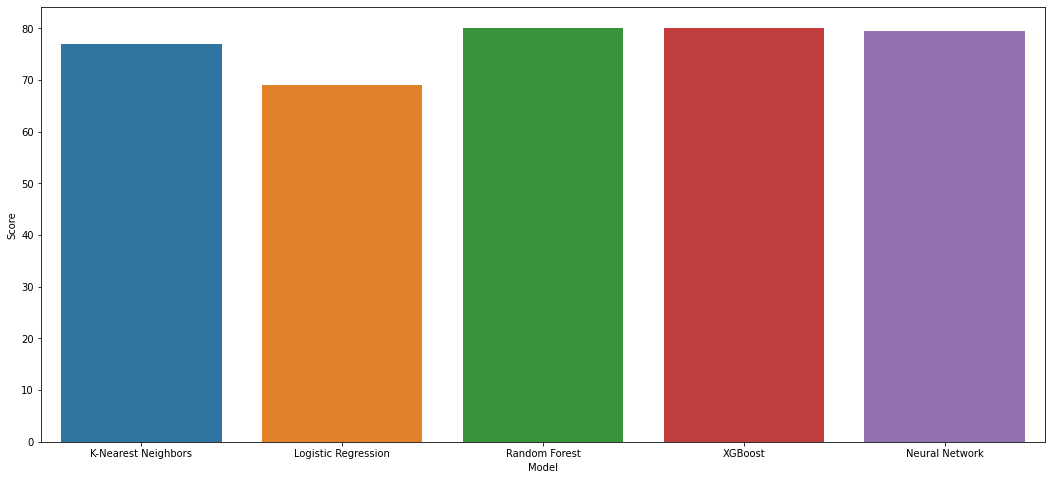

In [ ]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

As a result,we can say that Random Forest Classifier is the best model with 80% of the accuracy.